### visualize the hidden layer's output

* https://gist.github.com/awjuliani/acde9d491658265c3fbf6a74b91518e3#file-deep-layer-visualization-ipynb

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt
import math

import tensorflow as tf

/Users/leiming/anaconda2/envs/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [3]:
reset_graph()

### load the pretrained neural nets on mnist (see class02)

##### model defined

In [4]:
n_inputs = 28*28  # MNIST
n_hidden1 = 50
n_outputs = 10 # digits 0-9, 10 classes


X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="input")   # "None" is for batch size
y = tf.placeholder(tf.int32, shape=(None), name="y")

x_image = tf.reshape(X,[-1,28,28,1])  # reshpae for 2d conv


with tf.name_scope("dnn"):
    conv1 = tf.contrib.layers.conv2d(x_image, num_outputs = 16, kernel_size=3, padding='same')
    hidden1 = tf.layers.dense(tf.contrib.layers.flatten(conv1),   n_hidden1, name="hidden1", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden1, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)
    
    
    
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

##### restore

In [5]:
saver = tf.train.Saver()
sess=tf.Session() 
saver.restore(sess, "./my_model_final.ckpt")


INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


##### load mnist data

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0

y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

##### plot test data

In [7]:
X_test.shape

(10000, 784)

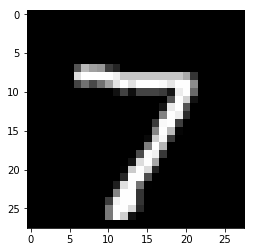

In [8]:
# plot 1st test image
imageToUse = X_test[0]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")

In [9]:
imageToUse.shape

(784,)

In [10]:
# def plotNNFilter(units):
#     filters = units.shape[3]
#     plt.figure(1, figsize=(20,20))
#     n_columns = 6
#     n_rows = math.ceil(filters / n_columns) + 1
#     for i in range(filters):
#         plt.subplot(n_rows, n_columns, i+1)
#         plt.title('Filter ' + str(i))
#         plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

    

In [11]:
conv1_outcome = sess.run(conv1, feed_dict={X: np.reshape(X_test[0], [1, 784])})

In [12]:
conv1_outcome.shape

(1, 28, 28, 16)

In [13]:
def plotFilter (outcome):
    filterNum = outcome.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 4
    n_rows = math.ceil(filterNum / n_columns) + 1
    for i in range(filterNum):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(outcome[0,:,:,i], interpolation="nearest", cmap="gray")

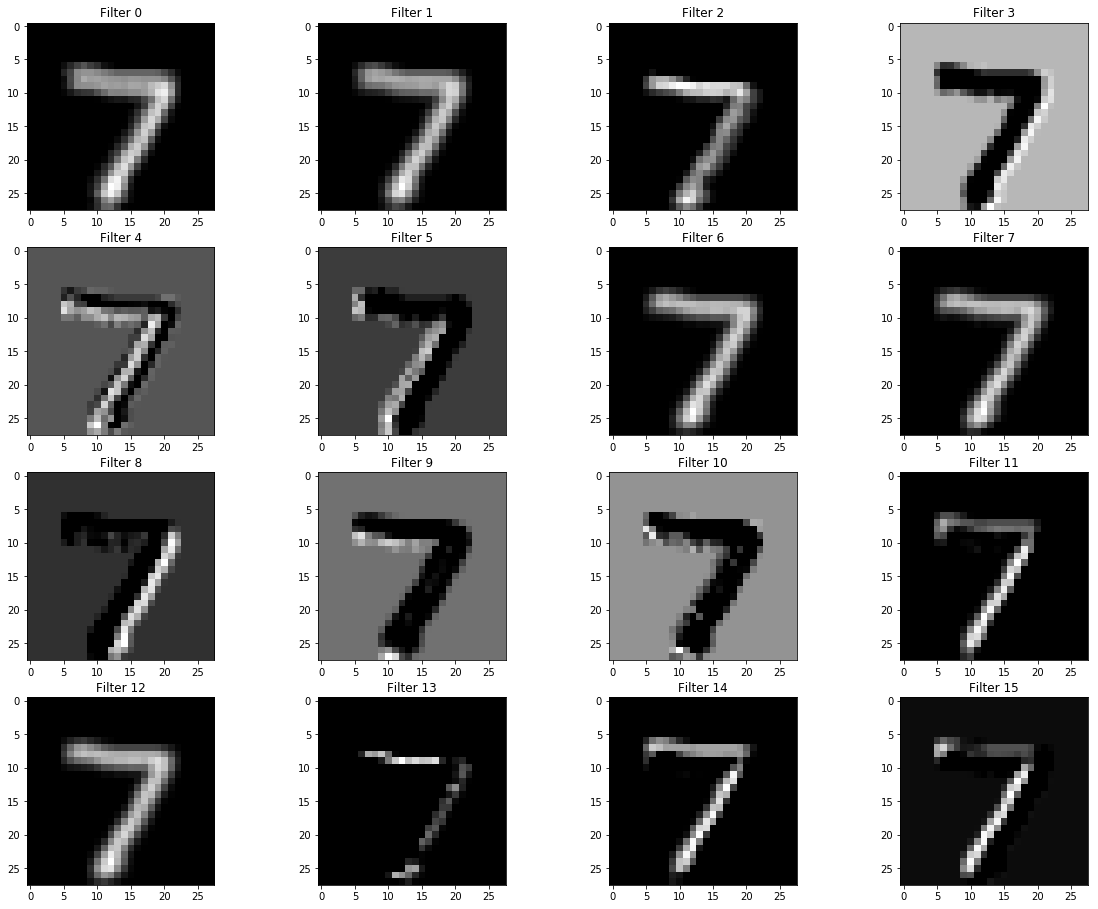

In [14]:
plotFilter(conv1_outcome)

In [15]:
sess.close()

reference
* http://cv-tricks.com/tensorflow-tutorial/save-restore-tensorflow-models-quick-complete-tutorial/
* https://stackoverflow.com/questions/39969751/how-to-load-pre-trained-tensorflow-model-named-inception-by-google/43677411 (check)
* https://gist.github.com/awjuliani/acde9d491658265c3fbf6a74b91518e3#file-deep-layer-visualization-ipynb (visualize)